## **회귀모델 알아보기 - 전복 수명 예측하기**
### <b> <font color=green> [데이터 준비하기]     
### [회귀모델 구현하기] </font> </b>     
1) 사용 라이브러리 파악하고 가져오기    
2) 모델 객체 생성하고 학습하기   
3) 모델 예측하고 정확도 확인하기


## <font color=green>**[ 데이터 준비 ]**

### **Step 1 : 데이터 확인하기**
* 데이터 전처리에 사용되는 라이브러리를 가져온다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

* 'abalone.csv'파일을 읽어 'df'에 저장한 후 내용을 출력한다.

In [5]:
#코드작성
df = pd.read_csv("./data/abalone.csv")
df.head()

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* 데이터 정보를 파악한다.

In [8]:
#코드작성
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- Gender : 성별 (female, male, infant)
- Length : 길이
- Diameter : 직경
- Height : 높이
- Whole Weight : 전체 무게
- Shell Weight : 껍질 무게
- Shucked Weight : 껍질 벗긴 무게
- Viscera Weight : 내장 무게
- Rings : 전복 수명 (target)

### **step2. 데이터 준비하기**
- 특성 항목으로 'X'에 'Whole_weigh'를, 타겟 항목으로 'y'에 'Rings'를 지정한다.

In [11]:
#코드작성
# 데이터를 다 안다는 가정하에 바로 항목 지정
# 단순 선형회기기 때문에 항목이 1개씩임
# 그런데 반드시 입력은 2차원이어야함

X = df[["Whole_weight"]]
y = df["Rings"]

- 학습 데이터와 테스트 데이터를 7:3의 비율로 나눈다.

In [13]:
#코드작성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <font color=green> **[기계학습 회귀 모델 구현]** </font>

### **step1. 라이브러리 가져오기**
- 선형회귀모델을 구현하기 위한 라이브러리를 가져온다.

In [14]:
import matplotlib.pyplot as plt

# 회기 모델 import
from sklearn.linear_model import LinearRegression
# 평가 데이터가 달라서 기존과 
# MAE: 오차라서 숫자가 작을 수록 좋은 모델이다
# MAE: 오차라서 숫자가 작을 수록 좋은 모델이다
# r2_score: 숫자가 1에 가까울 수록 값들이 선 위에 있다
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Step 2 : 모델 객체 생성하기**  

- LinearRegression() 모델 객체 ‘model_lr‘을 생성한다.

In [17]:
#코드작성
model_lr = LinearRegression()

### **step3. 모델 학습하기**
- 선형 모델(model_ln)이 학습 데이터셋(X_train, y_train)으로 학습한다.

In [38]:
#코드작성
model_lr.fit(X_train, y_train)

LinearRegression()

### **step4.모델 예측하기**

1) 모델 예측하기
- 학습된 모델을 사용하여 테스트 데이터셋(X_test)에 대한 예측값을 ‘y_pred’ 에 저장한다.

In [39]:
y_pred = model_lr.predict(X_test)#코드작성
y_pred

array([10.92440446, 10.11125256, 10.49318754, ...,  9.76627903,
       12.29901838,  8.1822169 ])

- 테스트 데이터의 실제값인 y_test와 학습모델이 예측한 y_pred를 출력해본다.

In [40]:
df_result = pd.DataFrame(columns=['Actual', 'Predicted'])

#코드작성
df_result["Actual"] = y_test
df_result["Predicted"] = y_pred

df_result.head()

,Actual,Predicted
866,9,10.924404
1483,8,10.111253
599,16,10.493188
1702,9,11.480586
670,14,9.213617


2) 모델의 기울기와 절편 확인하기
- LinearRegression() 모델이 학습한 선형 회귀식의 기울기(coef_)와 절편 (intercept_)를 확인한다

In [41]:
#코드작성

dir(model_lr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [42]:
print("기울기: ", model_lr.coef_, "\n절편: "model_lr.intercept_)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2527297387.py, line 1)

3) 모델로 예측한 최적합선 시각화하기

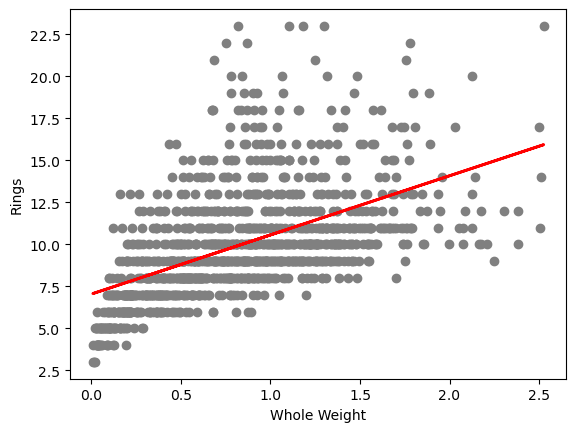

In [43]:
plt.figure()

#코드작성 : X_test, y_test 산점도를 그린다.
plt.scatter(X_test, y_test, color="grey")

#코드작성 : X_test, y_pred 선을 그린다.
plt.plot(X_test, y_pred, color="red", linewidth=2)

#코드작성 :  x축 label -'Whole_weight', y축 label - 'Rings' 로 표시한다.
plt.xlabel("Whole Weight");
plt.ylabel("Rings");

### **step5. 모델 평가하기**

- 평균 제곱 오차(MSE)와 평균 절대 오차(MAE) 그리고 결정계수(R2)을 이용하여 모델의 성능을 평가한다.

In [44]:
print ("Linear Regression Score")
#코드작성 : mean_squared_error(), mean_absolute_error()를 출력한다.
print ("Mean Squared Error\n- ", mean_squared_error(y_test,y_pred))
print ("Mean Absolute Error\n-", mean_absolute_error(y_test,y_pred))### **step5. 모델 평가하기**
print ("R2\n-", r2_score(y_test,y_pred))

Linear Regression Score
Mean Squared Error
-  7.059276238381288
Mean Absolute Error
- 1.977585631965429
R2
- 0.30481694539508697


### **step6. 입력 조종해서 더 나은 모델 만들기**

- Gender : 성별 (female, male, infant)
- Length : 길이
- Diameter : 직경
- Height : 높이
- Whole Weight : 전체 무게
- Shell Weight : 껍질 무게
- Shucked Weight : 껍질 벗긴 무게
- Viscera Weight : 내장 무게
- Rings : 전복 수명 (target)

In [51]:
#코드작성
# 데이터를 다 안다는 가정하에 바로 항목 지정
# 단순 선형회기기 때문에 항목이 1개씩임
# 그런데 반드시 입력은 2차원이어야함

X1 = df.drop(columns=["Gender", "Rings"])
y1 = df["Rings"]

#train, test 분리
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

model_lr1 = LinearRegression()
model_lr1.fit(X1_train, y1_train)
y_pred1 = model_lr1.predict(X1_test) 

df_result1 = pd.DataFrame(columns=['Actual', 'Predicted'])
#코드작성

df_result1['Actual'] = y1_test
df_result1['Predicted'] = y_pred1

print ("Linear Regression Score")
#코드작성 : mean_squared_error(), mean_absolute_error()를 출력한다.
print ("MSE: ", mean_squared_error(y1_test,y_pred1))
print ("MAE: ", mean_absolute_error(y1_test,y_pred1))
print ("R2: ", r2_score(y1_test,y_pred1)) 

Linear Regression Score
MSE:  4.924934526360624
MAE:  1.6187084837894907
R2:  0.5150025424490754
